In [1]:
import pandas as pd
s = pd.read_csv('./BTC_USD.csv', index_col="Date", parse_dates=True, squeeze=True)
from adtk.data import validate_series
s = validate_series(s)

/var/folders/jj/hptxtjmd44v3d6fpspp7878h0000gn/T/ipykernel_5533/460624034.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./BTC_USD.csv', index_col="Date", parse_dates=True, squeeze=True)


In [2]:

from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=50000, low=30000)
anomalies = threshold_ad.detect(s)

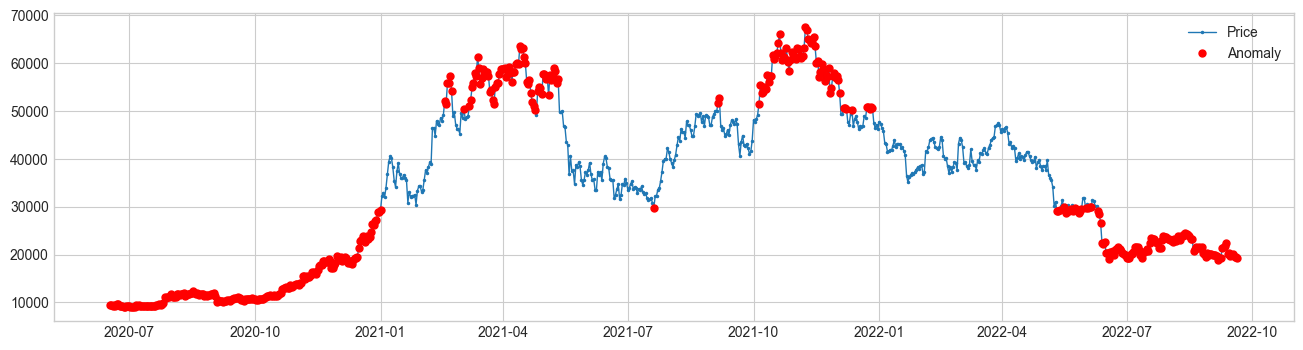

In [4]:
from adtk.visualization import plot
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

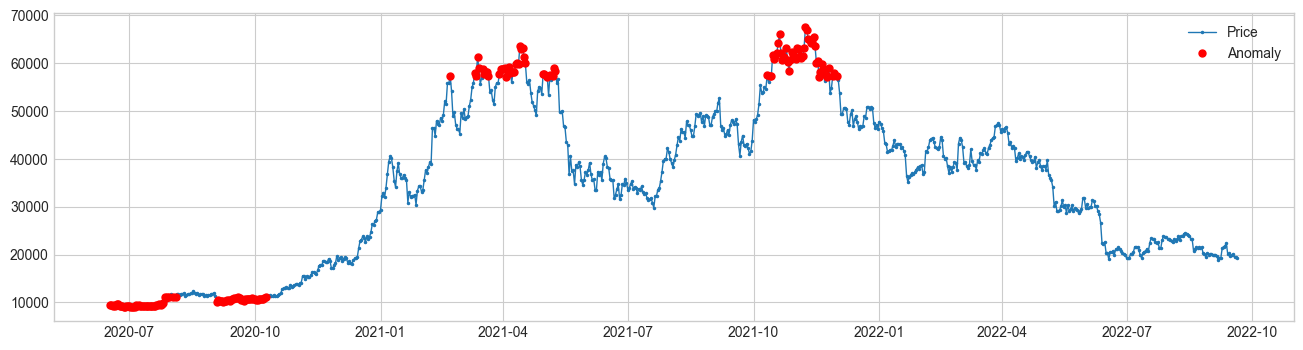

In [5]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.9, low=0.1)
anomalies = quantile_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

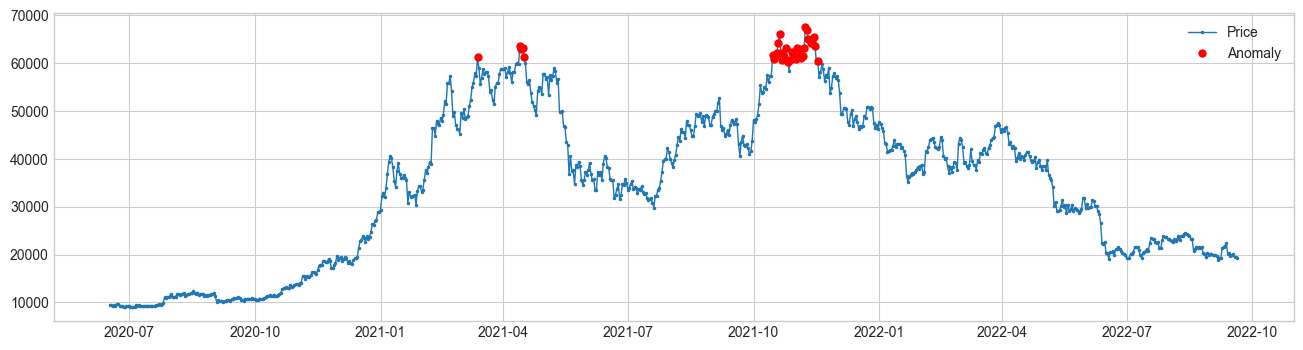

In [6]:
from adtk.detector import InterQuartileRangeAD
iqr_ad = InterQuartileRangeAD(c=0.5)
anomalies = iqr_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/adtk/data/_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


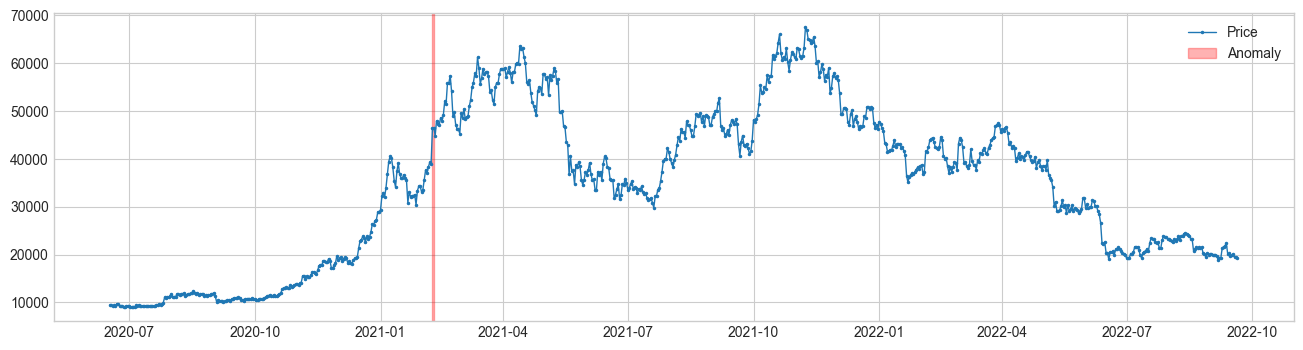

In [7]:
from adtk.detector import PersistAD
persist_ad = PersistAD(c=4, side='positive')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

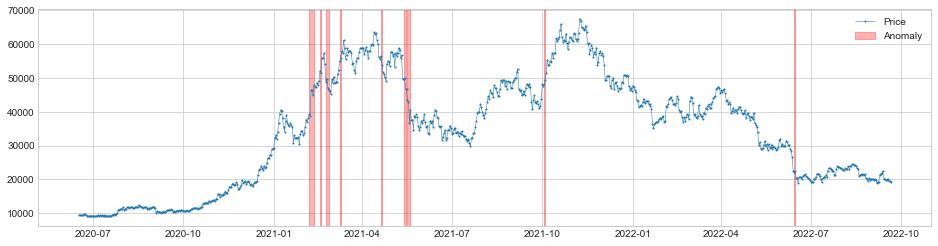

In [118]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=2, side='both', window=5)
anomalies = level_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

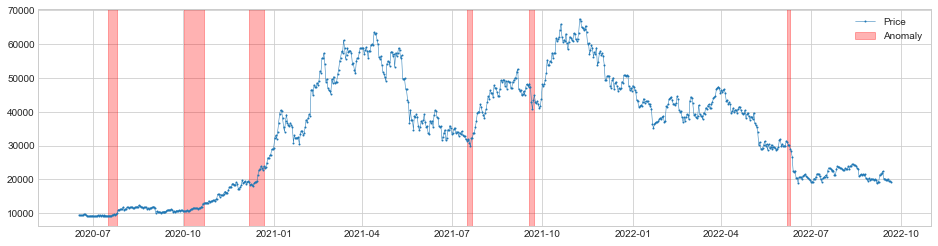

In [119]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=3.0, side='positive', window=30)
anomalies = volatility_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_40838/2129770426.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('./BTC_USD.csv', index_col="Date", parse_dates=True, squeeze=True)


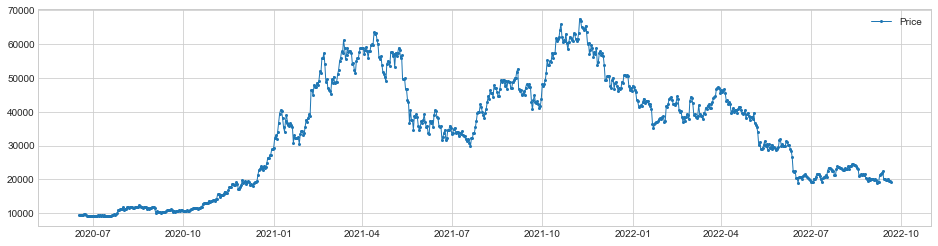

In [88]:
s = pd.read_csv('./BTC_USD.csv', index_col="Date", parse_dates=True, squeeze=True)
s = validate_series(s)
plot(s, ts_linewidth=1, ts_markersize=4);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/adtk/transformer/_transformer_1d.py:285: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  s_rolling = rolling.agg(agg)


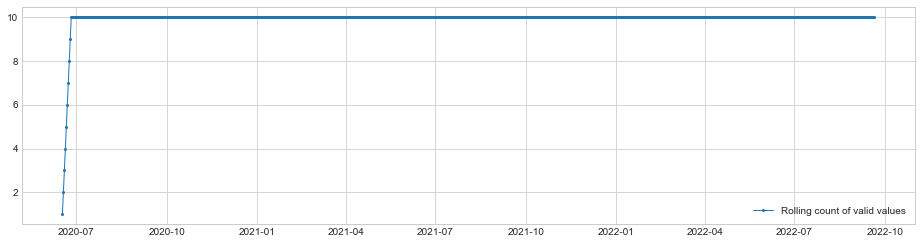

In [89]:
from adtk.transformer import RollingAggregate
s_transformed = RollingAggregate(agg='count', window=10).transform(s)
plot(s_transformed.rename("Rolling count of valid values"), ts_linewidth=1, ts_markersize=4);

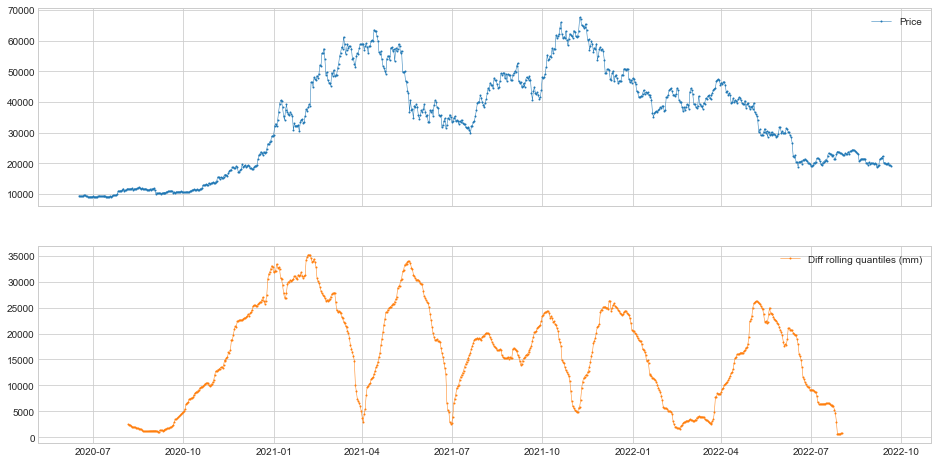

In [90]:
from adtk.transformer import DoubleRollingAggregate
s_transformed = DoubleRollingAggregate(
    agg="quantile",
    agg_params={"q": [0.1, 0.5, 0.9]},
    window=50,
    diff="l2").transform(s).rename("Diff rolling quantiles (mm)")

plot(pd.concat([s, s_transformed], axis=1));

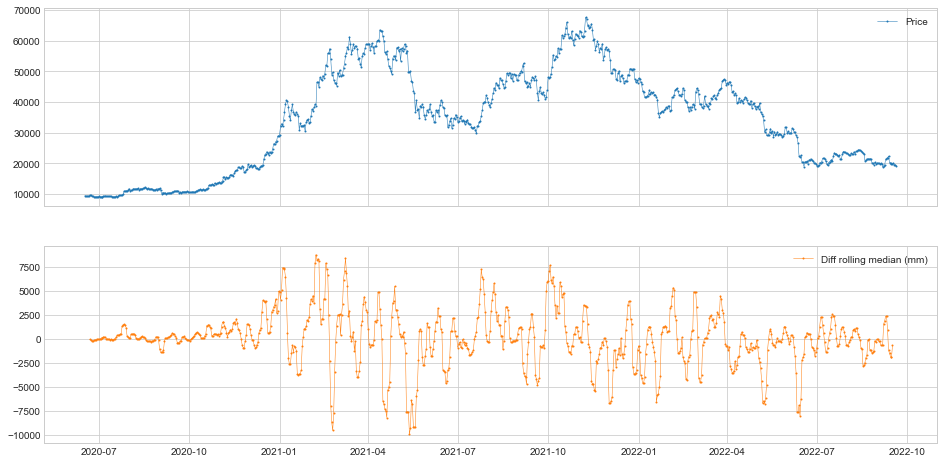

In [91]:
from adtk.transformer import DoubleRollingAggregate
s_transformed = DoubleRollingAggregate(
    agg="median",
    window=5,
    diff="diff").transform(s).rename("Diff rolling median (mm)")

plot(pd.concat([s, s_transformed], axis=1));

In [79]:
from adtk.pipe import Pipeline
from adtk.transformer import ClassicSeasonalDecomposition
steps = [
    ("deseasonal", ClassicSeasonalDecomposition()),
    ("quantile_ad", QuantileAD(high=0.995, low=0.005))
]
pipeline = Pipeline(steps)

/var/folders/vq/lr9jr0w132n5fxzlgyfxgg3h0000gn/T/ipykernel_40838/2376861261.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('BTC_USD_train.csv', index_col="Date", parse_dates=True, squeeze=True)


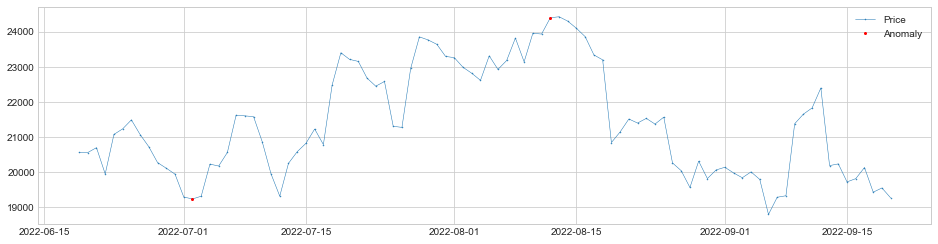

In [65]:
s = pd.read_csv('BTC_USD_train.csv', index_col="Date", parse_dates=True, squeeze=True)
s = validate_series(s)
anomalies = pipeline.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_markersize=2, anomaly_tag="marker", anomaly_color='red');

In [1]:
results = pipeline.fit_detect(s, return_intermediate=True)
plot(results["deseasonal"], ts_markersize=1); 

NameError: name 'pipeline' is not defined